# DS630(MACHINE LEARNING) FINAL PROJECT
## -SIMI SUDHAKARAN

In [21]:
# IMPORT THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [4]:
# IMPORT THE DATASET

df = pd.read_excel('CovidDeathUS2021.xlsx')
df.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,IS_COVID_PRESENT,ARE_THERE_NEW_COVID_DEATHS
0,9271,Marshall,Alabama,2021-01-01,America,New York Times,0,1095.0,USA,United States,US,82,86,True,False
1,1517,Barbour,Alabama,2021-01-01,America,New York Times,1,1005.0,USA,United States,US,3,33,True,True
2,1522,Butler,Alabama,2021-01-01,America,New York Times,0,1013.0,USA,United States,US,14,45,True,False
3,2418,Clarke,Alabama,2021-01-01,America,New York Times,1,1025.0,USA,United States,US,28,26,True,True
4,1756,Pickens,Alabama,2021-01-01,America,New York Times,0,1107.0,USA,United States,US,22,26,True,False


In [5]:
# WHOLE INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248083 entries, 0 to 248082
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   PEOPLE_POSITIVE_CASES_COUNT      248083 non-null  int64         
 1   COUNTY_NAME                      248083 non-null  object        
 2   PROVINCE_STATE_NAME              248083 non-null  object        
 3   REPORT_DATE                      248083 non-null  datetime64[ns]
 4   CONTINENT_NAME                   248083 non-null  object        
 5   DATA_SOURCE_NAME                 248083 non-null  object        
 6   PEOPLE_DEATH_NEW_COUNT           248083 non-null  int64         
 7   COUNTY_FIPS_NUMBER               244654 non-null  float64       
 8   COUNTRY_ALPHA_3_CODE             248083 non-null  object        
 9   COUNTRY_SHORT_NAME               248083 non-null  object        
 10  COUNTRY_ALPHA_2_CODE             248083 non-

In [6]:
# DROP IRRELEVANT COLUMNS
df_filtered = df.drop(columns=['COUNTY_NAME','PROVINCE_STATE_NAME','REPORT_DATE','CONTINENT_NAME','DATA_SOURCE_NAME',
         'COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_SHORT_NAME','COUNTRY_ALPHA_2_CODE'])

In [7]:
# 5 POINT SUMMARY OF THE DATASET
df_filtered.describe()

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,2.480830e+05,248083.000000,248083.000000,248083.000000
mean,8.834160e+03,0.562425,31.143545,162.028829
std,3.862826e+04,5.082005,210.108493,907.132052
min,0.000000e+00,-1009.000000,-8855.000000,0.000000
25%,8.520000e+02,0.000000,0.000000,13.000000
50%,2.062000e+03,0.000000,3.000000,38.000000
75%,5.470000e+03,0.000000,15.000000,93.000000
max,1.235783e+06,930.000000,19980.000000,32786.000000


In [8]:
# NEW AVERAGE DEATH COUNT PER DAY
df_filtered['PEOPLE_DEATH_NEW_COUNT'].mean()

0.5624246723878702

In [9]:
# TOTAL AVERAGE DEATH COUNT
df_filtered['PEOPLE_DEATH_COUNT'].mean()

162.0288290612416

In [10]:
# CORRELATION BETWEEN THE DIFFERENT FEATURES
df_filtered.corr()

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,IS_COVID_PRESENT,ARE_THERE_NEW_COVID_DEATHS
PEOPLE_POSITIVE_CASES_COUNT,1.000000,0.544253,0.607500,0.908214,0.097775,0.237220
PEOPLE_DEATH_NEW_COUNT,0.544253,1.000000,0.619967,0.492901,0.065249,0.254520
PEOPLE_POSITIVE_NEW_CASES_COUNT,0.607500,0.619967,1.000000,0.594284,0.100287,0.205482
PEOPLE_DEATH_COUNT,0.908214,0.492901,0.594284,1.000000,0.076284,0.203161
IS_COVID_PRESENT,0.097775,0.065249,0.100287,0.076284,1.000000,0.230909
ARE_THERE_NEW_COVID_DEATHS,0.237220,0.254520,0.205482,0.203161,0.230909,1.000000


Text(0.5, 1.0, 'US Covid19(2021) : Correlation between the different features')

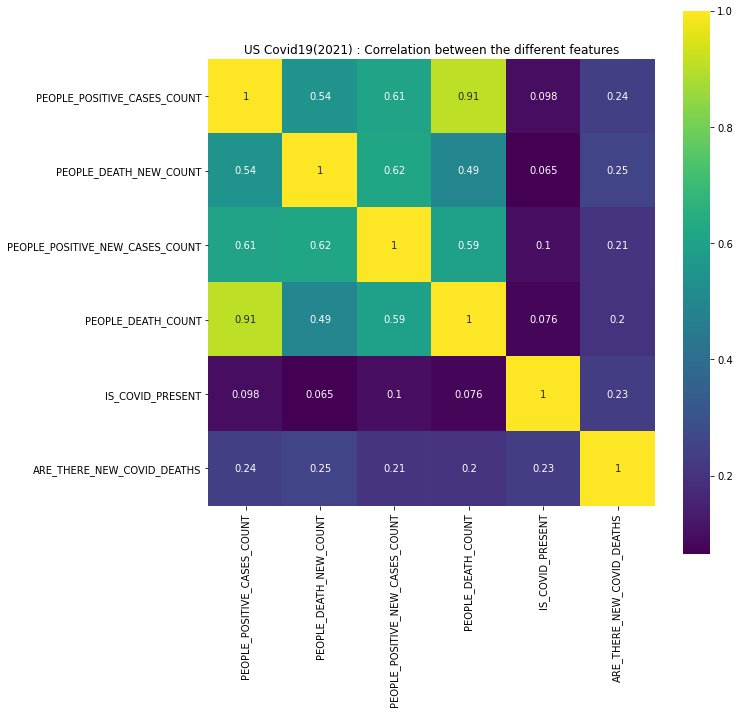

In [11]:
# LOTTING THE FEATURE CORRELATION
correlation = df_filtered.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square = True, annot=True, cmap = 'viridis')
plt.title("US Covid19(2021) : Correlation between the different features")

In [12]:
# INFORMATION FOR THE FILTERED DATASET
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248083 entries, 0 to 248082
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   PEOPLE_POSITIVE_CASES_COUNT      248083 non-null  int64
 1   PEOPLE_DEATH_NEW_COUNT           248083 non-null  int64
 2   PEOPLE_POSITIVE_NEW_CASES_COUNT  248083 non-null  int64
 3   PEOPLE_DEATH_COUNT               248083 non-null  int64
 4   IS_COVID_PRESENT                 248083 non-null  bool 
 5   ARE_THERE_NEW_COVID_DEATHS       248083 non-null  bool 
dtypes: bool(2), int64(4)
memory usage: 8.0 MB


In [13]:
# CONVERT THE CATEGORICAL VARIABLES TO DUMMY VARIABLES
df_filtered['ARE_THERE_NEW_COVID_DEATHS'] = df_filtered['ARE_THERE_NEW_COVID_DEATHS'].astype(int)
df_filtered['IS_COVID_PRESENT'] = df_filtered['IS_COVID_PRESENT'].astype(int)
print(df_filtered)

        PEOPLE_POSITIVE_CASES_COUNT  PEOPLE_DEATH_NEW_COUNT  \
0                              9271                       0   
1                              1517                       1   
2                              1522                       0   
3                              2418                       1   
4                              1756                       0   
...                             ...                     ...   
248078                          369                       0   
248079                         1405                       0   
248080                         4329                       0   
248081                         5179                       0   
248082                         3157                       0   

        PEOPLE_POSITIVE_NEW_CASES_COUNT  PEOPLE_DEATH_COUNT  IS_COVID_PRESENT  \
0                                    82                  86                 1   
1                                     3                  33                 1   


In [14]:
# ASSIGN THE TARGET VARIABLE(y) AND FEATURE VARIABLE(x)
x = df_filtered.iloc[:,0:3]
y = df_filtered.iloc[:, 5]

In [15]:
print(x)

        PEOPLE_POSITIVE_CASES_COUNT  PEOPLE_DEATH_NEW_COUNT  \
0                              9271                       0   
1                              1517                       1   
2                              1522                       0   
3                              2418                       1   
4                              1756                       0   
...                             ...                     ...   
248078                          369                       0   
248079                         1405                       0   
248080                         4329                       0   
248081                         5179                       0   
248082                         3157                       0   

        PEOPLE_POSITIVE_NEW_CASES_COUNT  
0                                    82  
1                                     3  
2                                    14  
3                                    28  
4                                

In [16]:
print(y)

0         0
1         1
2         0
3         1
4         0
         ..
248078    0
248079    0
248080    0
248081    0
248082    0
Name: ARE_THERE_NEW_COVID_DEATHS, Length: 248083, dtype: int64


In [12]:
#SCALE THE DATA BETWEEN 1 AND 0

standardScaler = StandardScaler()
x = standardScaler.fit_transform(x)
x

array([[ 0.01130884, -0.11067006,  0.24204903],
       [-0.18942544,  0.08610307, -0.13394795],
       [-0.189296  , -0.11067006, -0.08159394],
       ...,
       [-0.11662884, -0.11067006, -0.01972102],
       [-0.09462418, -0.11067006, -0.14822631],
       [-0.14696939, -0.11067006, -0.12442904]])

In [13]:
# PERFORM PCA ON THE DATASET
pca = PCA()
pca.fit_transform(x)

array([[ 0.08639834,  0.06838149,  0.24253409],
       [-0.13758679, -0.18979688, -0.07927678],
       [-0.21908273, -0.06061766,  0.05537745],
       ...,
       [-0.14119856, -0.01061588,  0.07867233],
       [-0.204776  ,  0.01323029, -0.03262496],
       [-0.22040832, -0.02682995,  0.00554753]])

In [17]:
# SPLITTING THE DATASET TO TEST AND TRAIN
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [18]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (198466, 3)
x_test:  (49617, 3)
y_train:  (198466,)
y_test:  (49617,)


In [19]:
# FUNCTION TO PRINT ALL THE MODEL ACCURACIES THAT WAS CALCULATED DURING GRID SEARCH
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### LOGISTIC REGRESSION CLASSIFIER

In [60]:
# RUNNING THE LOGISTIC REGRESSION CLASSIFIER USING GRID SEARCH
lr_classifier = LogisticRegression()
parameters = {
    'C' : [0.001] #Inverse regularization parameter
}
cv = GridSearchCV(lr_classifier, parameters, cv = 5) #cv is for k fold cross validation parameter
cv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'C': [0.001]})

In [61]:
# GIVES US THE HYPERPARAMETER SETTINGS WITH BEST ACCURACY SCORE
cv.best_estimator_

LogisticRegression(C=0.001)

In [62]:
# PREDICT THE TARGET VALUE USING THE FITTED LOGISTIC REGRESSION CLASSIFIER
y_pred = cv.predict(x_test)
print('Logistic Regression: Accuracy Score - ', accuracy_score(y_test, y_pred))

Logistic Regression: Accuracy Score -  0.8894733659834331


### K-NEAREST NEIGHBOR CLASSIFIER

In [49]:
# RUN THE K NEAREST NEIGHBOR CLASSIFIER ON THE DATASET
knn_classifier = KNeighborsClassifier()
parameters = {
    'n_neighbors':[5] #no of neighbors
}
cv_knn = GridSearchCV(knn_classifier, parameters, cv = 5, scoring='accuracy', n_jobs=-1, verbose=1)
cv_knn.fit(x_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.1s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.7s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5]}, scoring='accuracy', verbose=1)

In [50]:
#PREDICT THE ACCURACY SCORE USING THE FITTED KNN CLASSIFIER 
y_pred = cv_knn.predict(x_test)
print('K-Nearest Neighbor: Accuracy Score - ', accuracy_score(y_test, y_pred))

K-Nearest Neighbor: Accuracy Score -  0.9995364492008787


#### KNN on the non-PCA dataset

In [22]:
# RUN THE KNN CLASSIFIER ON NON SCALED DATASET TO CHECK FOR BETTER ACCURACY
knn_classifier = KNeighborsClassifier()
parameters = {
    'n_neighbors':[5]
}
cv_knn = GridSearchCV(knn_classifier, parameters, cv = 5, scoring='accuracy', n_jobs=-1, verbose=1)
cv_knn.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5]}, scoring='accuracy', verbose=1)

In [28]:
print_results(cv_knn)

BEST PARAMS: {'n_neighbors': 5}

0.852 (+/-0.003) for {'n_neighbors': 5}


In [32]:
# GENERATE A CLASSIFICATION REPORT TO CHECK FOR PRECISION, ACCURACY AND RECALL VALUES
y_pred = cv_knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     41118
           1       0.62      0.38      0.47      8499

    accuracy                           0.85     49617
   macro avg       0.75      0.66      0.69     49617
weighted avg       0.84      0.85      0.84     49617



### KERNEL SUPPORT VECTOR MACHINE CLASSIFIER

In [84]:
# RUN THE DATASET ON KERNEL(RBF) SUPPORT VECTOR MACHINE
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
parameter = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}
cv_svc = GridSearchCV(svc_classifier, parameter , cv=5)
cv_svc.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [87]:
y_pred = cv_svc.predict(x_test)
print('SUPPORT VECTOR MACHINE CLASSIFIER: Accuracy Score - ', accuracy_score(y_test, y_pred))

SUPPORT VECTOR MACHINE CLASSIFIER: Accuracy Score -  0.9998186105568656


#### SVM(kernel) on the non-PCA dataset

In [ ]:
from sklearn.svm import SVC

svc_classifier = SVC(random_state = 0)
parameter = {
    'kernel' : ['linear', 'rbf'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}
cv_svc = GridSearchCV(svc_classifier, parameter , cv=5, scoring='accuracy', verbose=1, n_jobs = -1)
cv_svc.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 2449.3min


In [ ]:
print_results(cv_svc)

In [ ]:
y_pred = cv_svc.predict(x_test)
print(classification_report(y_test,y_pred))

### DECISION TREE CLASSIFIER

In [36]:
# RUN THE DECISION TREE CLASSIFIER ON THE TEST AND TRAIN DATASET
parameters = {
    'criterion':["entropy"], 
    'splitter':["random"], 
    'max_depth':[15], 
    'min_samples_split':[4], 
    'min_samples_leaf':list(range(1, 5)), 
}

dt_classifier = DecisionTreeClassifier(random_state = 42)
cv_dt = GridSearchCV(dt_classifier, parameters,scoring='accuracy', n_jobs=-1, verbose=1, cv=3)
cv_dt.fit(x_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [15],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [4], 'splitter': ['random']},
             scoring='accuracy', verbose=1)

In [38]:
cv_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=4, random_state=42, splitter='random')

In [39]:
y_pred = cv_dt.predict(x_test)
print('DECISION TREE CLASSIFIER: Accuracy Score - ', accuracy_score(y_test, y_pred))

DECISION TREE CLASSIFIER: Accuracy Score -  0.941874760666707


#### Decion Tree Classifier on the non-PCA dataset

In [ ]:
# RUN THE DECISION TREE CLASSIFIER ON THE TEST AND TRAIN DATASET
parameters = {
    'criterion':["entropy"], 
    'splitter':["random"], 
    'max_depth':[15], 
    'min_samples_split':[4], 
    'min_samples_leaf':list(range(1, 5)), 
}

dt_classifier = DecisionTreeClassifier(random_state = 42)
cv_dt = GridSearchCV(dt_classifier, parameters,scoring='accuracy', n_jobs=-1, verbose=1, cv=3)
cv_dt.fit(x_train, y_train)


In [ ]:
print_results(cv_dt)

In [ ]:
y_pred = cv_dt.predict(x_test)
print(classification_report(y_test,y_pred))

### RANDOM FOREST CLASSIFER

In [41]:
# RUN THE RANDOM FOREST CLASSIFIER ON THE TEST AND TRAIN DATASET
parameters = {
    'n_estimators' : [100,500,1000,2000],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2,3,5],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4,10],
}

rf_classifer = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(rf_classifer, parameters, cv=5, verbose =1, n_jobs=-1)
cv_rf.fit(x_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 148.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 175.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000]},
             verbose=1)

In [43]:
y_pred = cv_rf.predict(x_test)
print('DECISION TREE CLASSIFIER: Accuracy Score - ', accuracy_score(y_test, y_pred))

DECISION TREE CLASSIFIER: Accuracy Score -  1.0


In [ ]:
# Random Forest Classifier on a non-PCA dataset

In [ ]:
# RUN THE RANDOM FOREST CLASSIFIER ON THE NON-SCALED DATASET
parameters = {
    'n_estimators' : [100,500,1000,2000],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2,3,5],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4,10],
}

rf_classifer = RandomForestClassifier(random_state=42)
cv_rf = GridSearchCV(rf_classifer, parameters, cv=5, verbose =1, n_jobs=-1)
cv_rf.fit(x_train, y_train)


In [ ]:
print_result(cv_rf)

In [ ]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

### ENSEMBLING METHOD: ADABOOST ALGORITHM

In [77]:
# USE THE ENSEMBLING TECHNIQUES TO BOOST THE ACCURACY SCORE
adaboost_clf = AdaBoostClassifier(random_state=42)
parameters = {
    'learning_rate' : [0.1,1,0.01,0.5],
    'n_estimators' : [100,120,140,160,180, 200]
}
cv_adaboost = GridSearchCV(adaboost_clf, parameters, cv = 5, n_jobs=-1, verbose=1)
cv_adaboost.fit(x_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 120, 140, 160, 180, 200]},
             verbose=1)

In [78]:
y_pred = cv_adaboost.predict(x_test)
print('ADABOOST CLASSIFIER: Accuracy Score - ', accuracy_score(y_test, y_pred))

ADABOOST CLASSIFIER: Accuracy Score -  1.0


In [ ]:
# Adaboost on a non-PCA dataset

In [ ]:
# USING THE ADABOOST ENSEMBLE TECHNIQUE TO BOOST THE ACCURACY SCORE USING THE NON-SCALED DATASET
adaboost_clf = AdaBoostClassifier(random_state=42)
parameters = {
    'learning_rate' : [0.1,1,0.01,0.5],
    'n_estimators' : [100,120,140,160,180, 200]
}
cv_adaboost = GridSearchCV(adaboost_clf, parameters, cv = 5, n_jobs=-1, verbose=1)
cv_adaboost.fit(x_train, y_train)

In [ ]:
print_result(cv_adaboost)

In [ ]:
y_pred = cv_adaboost.predict(x_test)
print(classification_report(y_test,y_pred))